In [1]:
# FCG22 - T2 Gattass
import numpy as np
from algebra import *
import matplotlib.pyplot as plt
from camera import Camera
from img360 import Img360
import cena as cn
import math


path = './img360/'
img_name ='Sunset_Southside_Slopes_Pittsburgh_Equirectangular_Panoramic.jpg'
fname = path+img_name
img360 = Img360(fname)


In [2]:
eye = Vector3.create(0,0,0)

at = Vector3.create(0,1,0)
up = Vector3.create(0,0,1)


"""
    Objeto Câmera

    Parameters:
        fov (int): campo de visão
        width (int): largura da imagem em pixels
        height (int): altura da imagem em pixels

        near (float): plano de projeção, a partir de onde a câmera enxerga
        far (float): raio da esfera do ambiente, até onde a câmera enxerga


        eye (np.array): centro de projeção da câmera
        at (np.array): posição da visada (Alvo), define o eixo z da câmera
        up (np.array): direção pra cima

        img360(np.array): imagem 360 que define o "background" da camera

    Returns:
        Camera: instância do objeto câmera
"""
camera = Camera(60,800,600,1,10, eye, at, up, img360)

Camera: 
	Field of Vision = 60, Near = 1, Far = 10
	Width = 800, Height = 600, Aspect = 1.3333333333333333
	Eye=[0. 0. 0.]
	Xe = [1. 0. 0.], Ye = [ 0.  0. -1.], Ze = [0. 1. 0.] 


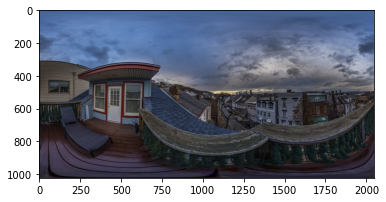

In [3]:
camera.showConfigurations()

In [4]:
o,d = camera.raio(0,0)

In [5]:
print(o,d)

[0. 0. 0.] [-0.76980036  1.          0.57735027]


In [6]:
cena = cn.Cena(camera)

In [11]:
img_render = cena.render()

In [20]:
import plotly as py
import plotly.express as px

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt


<module 'cena' from '/Users/pedrogomes/Mestrado/CG/trabalho2/cena.py'>

In [95]:
def plot_func(freq):
    y_ax = 1
    x_ax = 1
    if freq >= -math.pi/2.0 and freq <= 0.0: # ok
        x_ax = -math.tan(freq)
    elif freq > 0.0 and freq <= math.pi/2.0: # ok
        y_ax = 1 
        x_ax = -math.tan(freq)
    elif freq > math.pi/2.0 and freq <= math.pi: # ok
        y_ax = -1
        x_ax = math.tan(freq)
    else:   # 
        y_ax = -1
        x_ax = math.tan(freq)
    new_at = Vector3.create(x_ax,y_ax,0)
    cena.move_camera(new_at)
    img_render = cena.render()
    plt.imshow(img_render)

In [96]:
interact(plot_func, freq = widgets.FloatSlider(value=0.0,
                                               min=-math.pi,
                                               max=math.pi,
                                               step=0.2))

interactive(children=(FloatSlider(value=0.0, description='freq', max=3.141592653589793, min=-3.141592653589793…

<function __main__.plot_func(freq)>